In [0]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import math
import pickle

from sklearn.utils import resample
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression

import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/MAAI/data/train.csv')
df.to_hdf('train.h5', 'train')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['bidid', 'userid', 'useragent', 'IP', 'domain', 'url', 'slotid', 'slotvisibility', 'slotformat', 'creative', 'keypage', 'usertag']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,NaN,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,NaN,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,NaN,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,NaN,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,NaN,1120200150,728,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [0]:
df_val = pd.read_csv('/content/gdrive/My Drive/MAAI/data/validation.csv')
df_val.to_hdf('validation.h5', 'val')
df_val.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['bidid', 'userid', 'useragent', 'IP', 'domain', 'url', 'slotid', 'slotvisibility', 'slotformat', 'creative', 'keypage', 'usertag']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,trqRTvFRLpscFU,5ede68cc7542a34777fb8a1574856b6f,NaN,mm_10027070_2459574_9659312,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,trqRTu1YP5scFsf,cff326604db401e7d4f895fd747f7e91,NaN,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,trqRTv14MqTR1m58uG,93f242f025dc7d424c4ba7002b177df7,NaN,2996225656,300,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,trqRTvdJMoFoFoc4JKn,40c388f45dbc0e1fc53a8c6c81305de5,NaN,3481684581,336,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,tKFJeun0BouoXOl4JKTI,fcf53e0e5f09aa8d7e1c9d986cea321,NaN,1120607322,200,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [0]:
df_test = pd.read_csv('/content/gdrive/My Drive/MAAI/data/test.csv')
df_test.to_hdf('test.h5', 'test')
df_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['bidid', 'userid', 'useragent', 'IP', 'domain', 'url', 'slotid', 'slotvisibility', 'slotformat', 'creative', 'keypage', 'usertag']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,75045dd2f2136c93fe55fe6c446ec1527ed8f0bb,windows_chrome,27.197.36.*,146,159,3.0,DDTSQuf0MTTNaqKIvMpENpn,304ad7dde708d3c5d96a2d1da9df4a0,NaN,Astro_F_Rectangle,300,250,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304..."
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,11279eb1f8f7a88f877db911673522b6ff202aa7,android_safari,124.126.227.*,1,1,NaN,d63d96468f66986d5a8eb5225ad0b6f0,89d349adb4281177074e20b98bc8ab53,NaN,2745306850,320,50,FirstView,Na,5,11908,NaN,2997,NaN
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,4771a819a3f5b86776d8a9456f4f2506578f78d8,windows_ie,116.116.104.*,27,34,1.0,trqRTJkrBoq7JsNr5SqfNX,73d2422dcb98bc75ffa4bf00a52f5d1a,NaN,mm_34022157_3445226_11175100,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008..."
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,5360671379f3204afa9cc0edd8fd2e2096cb09eb,windows_ie,115.46.145.*,238,245,4.0,6d27caf5a202ec085f80af7163ef7cb0,3fb2288f3baaca1f8b40a84986e058c1,NaN,210842,960,90,FirstView,Na,30,10717,NaN,2821,"10075,13042,10006,10110,13776,10031,10063"
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,d791b5f6306b9d299f81daa5448ced7e5bfa010f,windows_ie,221.199.203.*,27,35,3.0,3FKElpuEMusyJqKbuKz,397f6f1aebf28e346e9f102cab42cafd,NaN,Fashion_F_Rectangle,300,250,0,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063


# **Feature Engineering**

In [0]:
def feature_engineering(df):
  #Extract operating system and browser from useragent.
  df['os'], df['browser'] = df['useragent'].str.split('_').str
  
  #Preprocessing by dropping irrelevant columns 
  columns = ['userid','bidid','useragent','IP', 'domain','url', 'urlid', 'slotid', 'creative','bidprice','payprice', 'keypage']
  df = df.drop(columns=columns)
  
  #Separate slotprice into bins
  df['slotprice'] = pd.cut(df['slotprice'], [-1, 1, 10, 50, 100, np.inf], labels=['0', '1-10', '11-50', '51-100', '101+'])
  
  #One-hot encoding for these features.
  df = pd.get_dummies(df, columns=['slotprice','os','browser','slotvisibility','slotformat','adexchange'])
  
  #Split usertags into binary features using one hot encoding.
  df['usertag'] = df['usertag'].astype(str)
  mlb = MultiLabelBinarizer()
  df = df.join(pd.DataFrame(mlb.fit_transform(df['usertag'].str.split(',')),index=df.index,columns='usertag_' + mlb.classes_))
  df = df.drop(columns='usertag')
  
  #Create one hot encoding for all of the following features. 
  df = pd.get_dummies(df, columns=['weekday'])
  df = pd.get_dummies(df, columns=['hour'])
  df = pd.get_dummies(df, columns=['region'])
  df = pd.get_dummies(df, columns=['city'])
  df = pd.get_dummies(df, columns=['slotheight'])
  df = pd.get_dummies(df, columns=['slotwidth'])
  df = pd.get_dummies(df, columns=['advertiser'])

  return df

In [0]:
df = feature_engineering(df)
df.head()

,click,slotprice_0,slotprice_1-10,slotprice_11-50,slotprice_51-100,slotprice_101+,os_android,os_ios,os_linux,os_mac,os_other,os_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld,slotvisibility_0,slotvisibility_1,slotvisibility_2,slotvisibility_255,slotvisibility_FifthView,slotvisibility_FirstView,slotvisibility_FourthView,slotvisibility_Na,slotvisibility_OtherView,slotvisibility_SecondView,slotvisibility_ThirdView,slotformat_0,slotformat_1,slotformat_5,slotformat_Na,adexchange_1.0,adexchange_2.0,adexchange_3.0,adexchange_4.0,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,...,city_394,city_395,city_396,city_397,city_398,city_399,slotheight_50,slotheight_60,slotheight_80,slotheight_90,slotheight_100,slotheight_125,slotheight_150,slotheight_200,slotheight_230,slotheight_240,slotheight_250,slotheight_280,slotheight_300,slotheight_600,slotwidth_120,slotwidth_125,slotwidth_160,slotwidth_180,slotwidth_200,slotwidth_234,slotwidth_250,slotwidth_300,slotwidth_320,slotwidth_336,slotwidth_360,slotwidth_468,slotwidth_620,slotwidth_640,slotwidth_728,slotwidth_760,slotwidth_910,slotwidth_950,slotwidth_960,slotwidth_980,slotwidth_1000,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,advertiser_3386,advertiser_3427,advertiser_3476
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# **Downsampling**

In [0]:
df['click'].value_counts()

0    2429188
1       1793
Name: click, dtype: int64

In [0]:
def downsample(df):
  # Separate clicks into categories of 0 and 1.
  df_majority = df[df.click==0]
  df_minority = df[df.click==1]

  # Downsample by sampling an equal amount of rows from the click 0 class compared to click 1.
  df_majority_ds = resample(df_majority, replace=False, n_samples=1793) 
#   print(df_majority_ds.head(1))

  # Concatenate the downsampled majority df and the minority df.
  df_ds = pd.concat([df_majority_ds, df_minority])
  
  return df_ds

In [0]:
#Moel re-calibration after downsampling. P is the output CTR from the model and w is the rate/fraction of downsampling dataset. 
def calibrate(p,w):
  return p/(p+((1-p)/w))

# **Logistic Regression to Predict Click-Through Rate (pCTR)**

In [0]:
df.shape

(3586, 589)

In [0]:
print(X_train.shape)

(3586, 588)


In [0]:
df_val.shape

In [0]:
X_val.shape

(303925, 588)

In [0]:
# loop 10 times
bid_list = []
for x in range(1,11):
  df = downsample(df)
  y_train = df.click
  X_train = df.drop(columns=['click'])
  
  lr = LogisticRegression(solver='lbfgs', max_iter=500, class_weight='balanced') 
  lr.fit(X_train, y_train)
  
  df_pval = feature_engineering(df_val)
  y_val = df_pval.click
  X_val = df_pval.drop(columns=['click'])
    
  click_prob_val = lr.predict_proba(X_val)[:,1]
  
  for i in range(0,len(click_prob_val)):
    click_prob_val[i] = calibrate(click_prob_val[i],0.001)
    
  bid_list.append(click_prob_val)
  print(x)
print(bid_list) 

1
2
3
4
5
6
7
8
9
10
[array([0.00032359, 0.00023195, 0.0001518 , ..., 0.00076886, 0.00017206,
       0.00054336]), array([0.00032363, 0.00023203, 0.00015177, ..., 0.00076878, 0.00017208,
       0.00054324]), array([0.0003236 , 0.00023206, 0.00015173, ..., 0.00076895, 0.00017201,
       0.00054317]), array([0.00032359, 0.00023199, 0.00015181, ..., 0.00076881, 0.00017203,
       0.00054316]), array([0.00032361, 0.00023202, 0.0001518 , ..., 0.00076886, 0.00017207,
       0.00054322]), array([0.00032365, 0.00023201, 0.00015178, ..., 0.00076887, 0.00017206,
       0.00054325]), array([0.00032358, 0.00023201, 0.00015178, ..., 0.00076898, 0.00017199,
       0.00054308]), array([0.00032365, 0.00023204, 0.00015178, ..., 0.00076889, 0.00017202,
       0.00054318]), array([0.00032354, 0.00023212, 0.00015174, ..., 0.0007691 , 0.00017199,
       0.00054315]), array([0.00032358, 0.00023197, 0.00015176, ..., 0.00076912, 0.00017196,
       0.00054318])]


# **Linear Bidding Strategy**

 The following equation
 $$\begin{align}
 bid = base\_bid * \left(\frac{pCTR}{avgCTR}\right)
 \end{align}$$
 is used to predict the bid price. base_bid  is the bid price for the average CTR cases and is the parameter we have to tune.


In [0]:
#Calculate the number of clicks for the winning impressions that have a total charge that is less than the budget.
def winning_clicks(df,bids,budget):
  win = df.copy()
  win['bids'] = bids
#   print(win.shape)
  win = win[win['bids']>win['payprice']]
  
  #Only include rows that has a total sum of less or equal to the budget.
  win['cumsum'] = win['payprice'].cumsum()
#   print(win['cumsum'].shape)
  win = win[win['cumsum']<=budget]
#   print(win['cumsum'].shape)
  
  clicks = np.sum(win.click)
  
  return clicks

In [0]:
print(bid_list)

[array([0.00032359, 0.00023195, 0.0001518 , ..., 0.00076886, 0.00017206,
       0.00054336]), array([0.00032363, 0.00023203, 0.00015177, ..., 0.00076878, 0.00017208,
       0.00054324]), array([0.0003236 , 0.00023206, 0.00015173, ..., 0.00076895, 0.00017201,
       0.00054317]), array([0.00032359, 0.00023199, 0.00015181, ..., 0.00076881, 0.00017203,
       0.00054316]), array([0.00032361, 0.00023202, 0.0001518 , ..., 0.00076886, 0.00017207,
       0.00054322]), array([0.00032365, 0.00023201, 0.00015178, ..., 0.00076887, 0.00017206,
       0.00054325]), array([0.00032358, 0.00023201, 0.00015178, ..., 0.00076898, 0.00017199,
       0.00054308]), array([0.00032365, 0.00023204, 0.00015178, ..., 0.00076889, 0.00017202,
       0.00054318]), array([0.00032354, 0.00023212, 0.00015174, ..., 0.0007691 , 0.00017199,
       0.00054315]), array([0.00032358, 0.00023197, 0.00015176, ..., 0.00076912, 0.00017196,
       0.00054318])]


In [0]:
#Max bid price is 300 and min bid price is 227
max_base_bid = 300
min_base_bid = 1
best_base_bid = 1
max_clicks = 0
# pCTR = click_prob_val
budget = 6250 * 1000
base_bids_list = []
bids_clicks_list = []
clicks_list = []

for pCTR in bid_list:
  print(pCTR)
  #Loop through each base_bid between min and max bid price.
  for base_bid in range(min_base_bid, max_base_bid + 1):
      bids = pCTR * (base_bid/avgCTR)

      clicks = winning_clicks(df_val,bids,budget)

      if clicks > max_clicks:
        max_clicks = clicks
        best_base_bid = base_bid

      clicks_list.append(clicks)

  print('Best base_bid: ' + str(best_base_bid))  
  base_bids_list.append(best_base_bid)
  best_base_bid = 1
  max_clicks = 0
  bids_clicks_list.append(clicks_list)
  clicks_list = []

best_base_bid = max(base_bids_list)
best_clicks_list = bids_clicks_list[base_bids_list.index(best_base_bid)]
print(best_base_bid)  

[0.00032359 0.00023195 0.0001518  ... 0.00076886 0.00017206 0.00054336]
Best base_bid: 65
[0.00032363 0.00023203 0.00015177 ... 0.00076878 0.00017208 0.00054324]
Best base_bid: 65
[0.0003236  0.00023206 0.00015173 ... 0.00076895 0.00017201 0.00054317]
Best base_bid: 65
[0.00032359 0.00023199 0.00015181 ... 0.00076881 0.00017203 0.00054316]
Best base_bid: 65
[0.00032361 0.00023202 0.0001518  ... 0.00076886 0.00017207 0.00054322]
Best base_bid: 65
[0.00032365 0.00023201 0.00015178 ... 0.00076887 0.00017206 0.00054325]
Best base_bid: 65
[0.00032358 0.00023201 0.00015178 ... 0.00076898 0.00017199 0.00054308]
Best base_bid: 65
[0.00032365 0.00023204 0.00015178 ... 0.00076889 0.00017202 0.00054318]
Best base_bid: 65
[0.00032354 0.00023212 0.00015174 ... 0.0007691  0.00017199 0.00054315]
Best base_bid: 66
[0.00032358 0.00023197 0.00015176 ... 0.00076912 0.00017196 0.00054318]
Best base_bid: 65
66


In [0]:
#Calculate Statistics for Evaluation
def evaluate(df,bids,budget):
  win = df.copy()
  win['bids'] = bids
  win = win[win['bids']>win['payprice']]
  
  #Only include rows that has a total sum of less or equal to the budget.
  win['cumsum'] = win['payprice'].cumsum()
  win = win[win['cumsum']<=budget]
  
  clicks = np.sum(win.click)
  
  print("Clicks: " + str(clicks))
  
  ctr = clicks/win.shape[0]
  print("CTR: " + str(ctr))

  total_spent = np.sum(win.payprice)
  print("Spend: " + str(total_spent))
  
  print("Average CPM  (Cost Per Mille): " + str(total_spent/win.shape[0]))
  
  print("Average CPC (Cost Per Click): " + str(total_spent/clicks))

In [0]:
#Evaluation
print('Best base_bid: ' + str(best_base_bid))    
bids = pCTR * (best_base_bid/avgCTR)
evaluate(df_val,bids,budget)

Best base_bid: 66
Clicks: 159
CTR: 0.0013138541374010477
Spend: 6230435
Average CPM  (Cost Per Mille): 51.48353963873143
Average CPC (Cost Per Click): 39185.125786163524


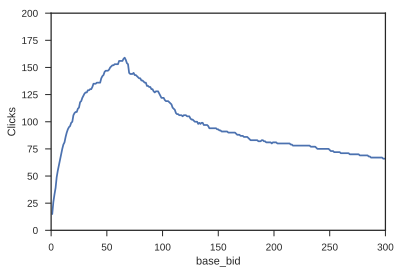

In [0]:
plt.plot(list(range(min_base_bid, max_base_bid + 1)), best_clicks_list)
plt.axis([0, 300, 0, 200])
plt.xlabel('base_bid')
plt.ylabel('Clicks')
plt.show()